ref: [imbalaced-learn](https://imbalanced-learn.org/stable/index.html)

In [14]:
%matplotlib inline


# Compare under-sampling samplers

The following example attends to make a qualitative comparison between the
different under-sampling algorithms available in the imbalanced-learn package.


In [ ]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

In [2]:
print(__doc__)

import seaborn as sns

sns.set_context("poster")

Automatically created module for IPython interactive environment


The following function will be used to create toy dataset. It uses the
:func:`~sklearn.datasets.make_classification` from scikit-learn but fixing
some parameters.



In [3]:
from sklearn.datasets import make_classification


def create_dataset(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )

The following function will be used to plot the sample space after resampling
to illustrate the specificities of an algorithm.



In [4]:
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

The following function will be used to plot the decision function of a
classifier given some data.



In [5]:
import numpy as np


def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

## Prototype generation: under-sampling by generating new samples

:class:`~imblearn.under_sampling.ClusterCentroids` under-samples by replacing
the original samples by the centroids of the cluster found.



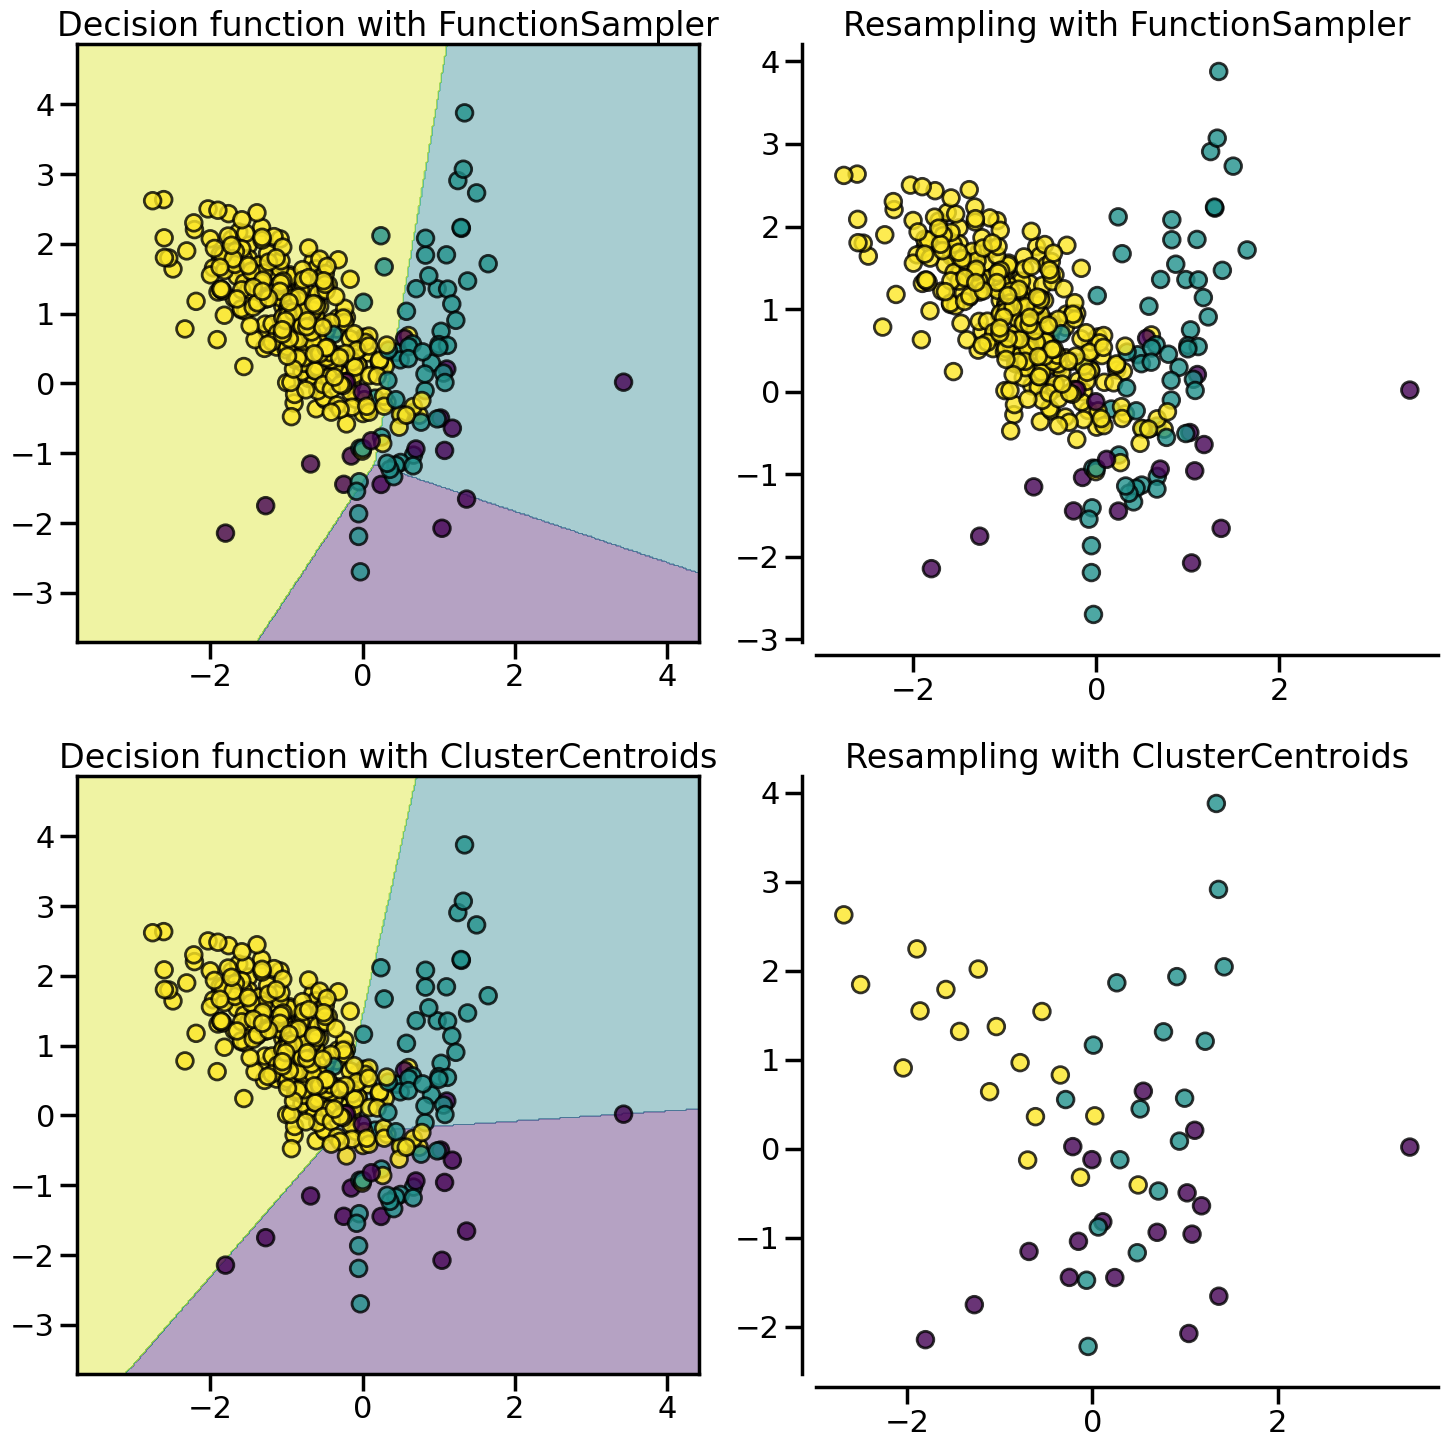

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import ClusterCentroids

X, y = create_dataset(n_samples=400, weights=(0.05, 0.15, 0.8), class_sep=0.8)

samplers = {
    FunctionSampler(),  # identity resampler
    ClusterCentroids(
        estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=0
    ),
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, model, ax[0], title=f"Decision function with {sampler.__class__.__name__}"
    )
    plot_resampling(X, y, sampler, ax[1])

fig.tight_layout()

## Prototype selection: under-sampling by selecting existing samples

The algorithm performing prototype selection can be subdivided into two
groups: (i) the controlled under-sampling methods and (ii) the cleaning
under-sampling methods.

With the controlled under-sampling methods, the number of samples to be
selected can be specified.
:class:`~imblearn.under_sampling.RandomUnderSampler` is the most naive way of
performing such selection by randomly selecting a given number of samples by
the targetted class.



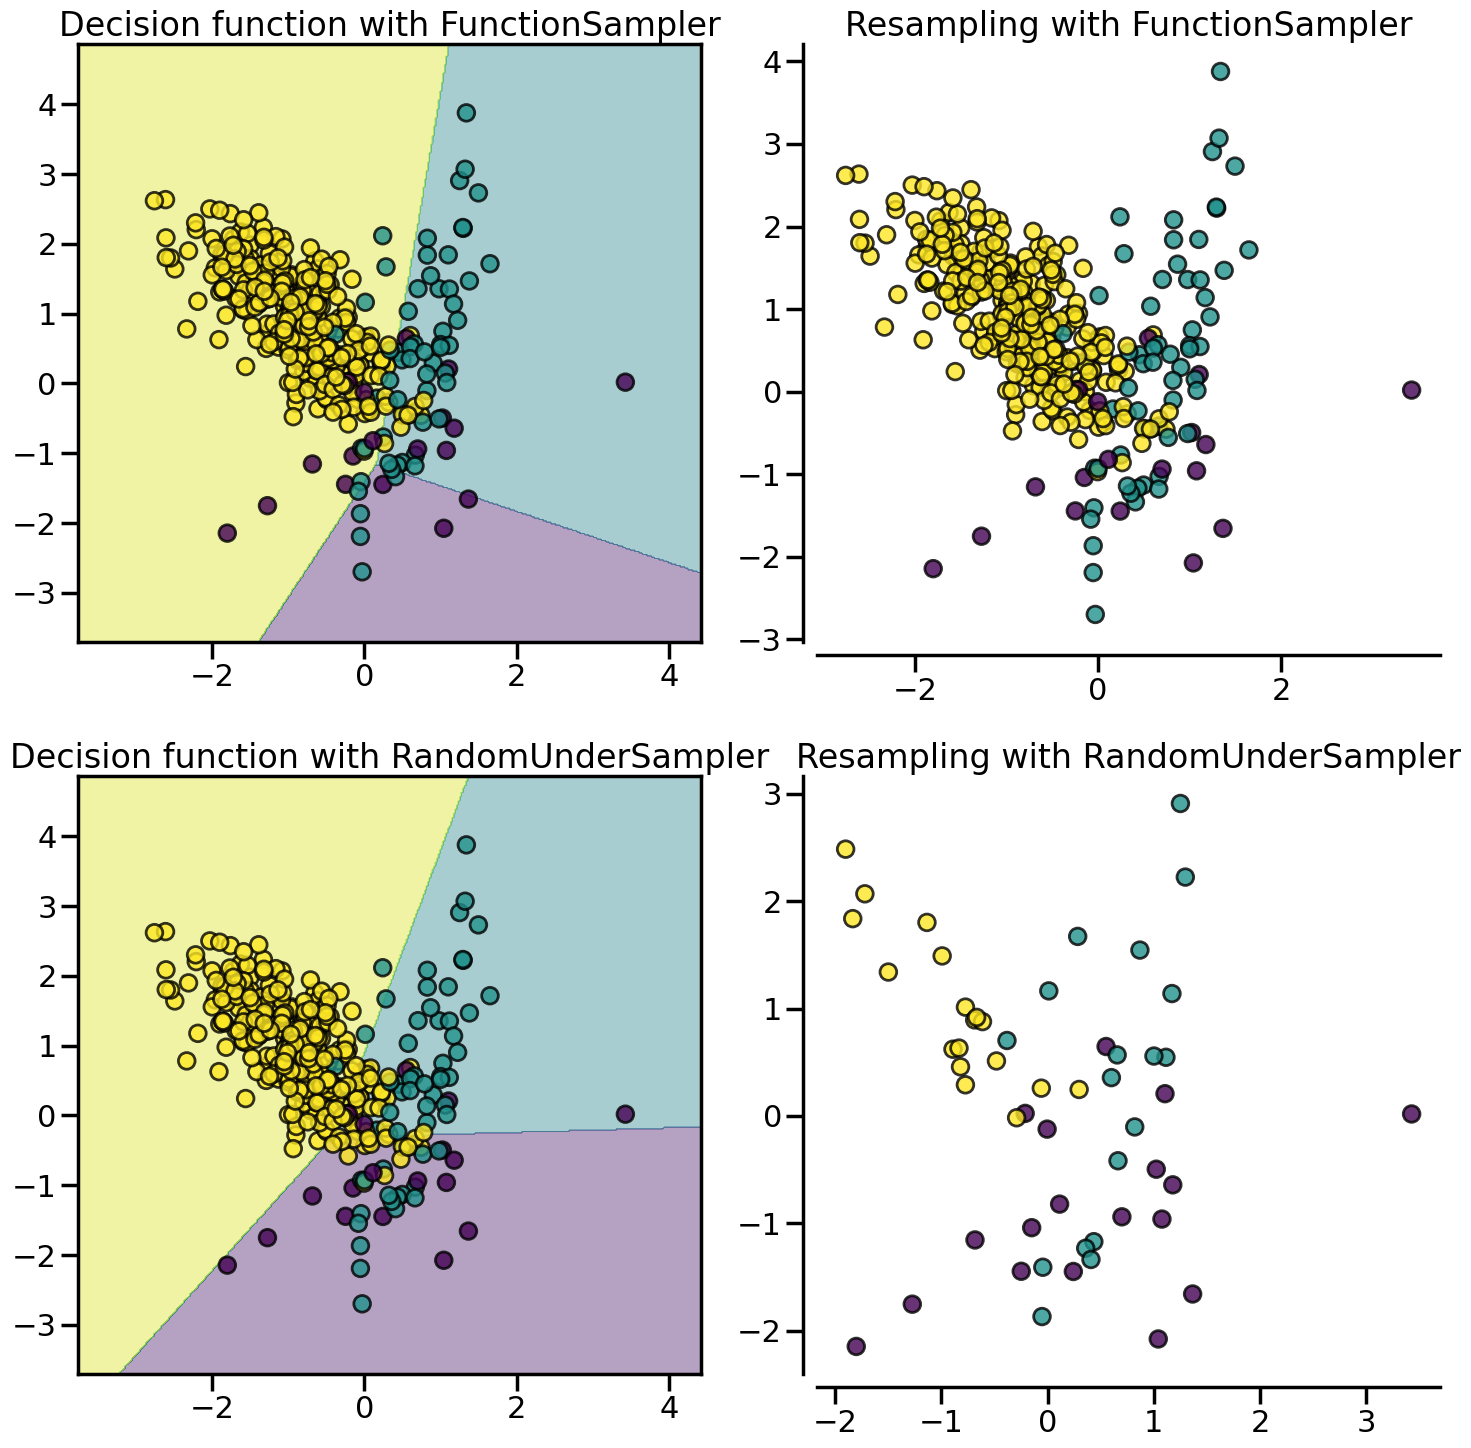

In [8]:
from imblearn.under_sampling import RandomUnderSampler

X, y = create_dataset(n_samples=400, weights=(0.05, 0.15, 0.8), class_sep=0.8)

samplers = {
    FunctionSampler(),  # identity resampler
    RandomUnderSampler(random_state=0),
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, model, ax[0], title=f"Decision function with {sampler.__class__.__name__}"
    )
    plot_resampling(X, y, sampler, ax[1])

fig.tight_layout()

:class:`~imblearn.under_sampling.NearMiss` algorithms implement some
heuristic rules in order to select samples. NearMiss-1 selects samples from
the majority class for which the average distance of the $k$` nearest
samples of the minority class is the smallest. NearMiss-2 selects the samples
from the majority class for which the average distance to the farthest
samples of the negative class is the smallest. NearMiss-3 is a 2-step
algorithm: first, for each minority sample, their $m$
nearest-neighbors will be kept; then, the majority samples selected are the
on for which the average distance to the $k$ nearest neighbors is the
largest.



/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/imble

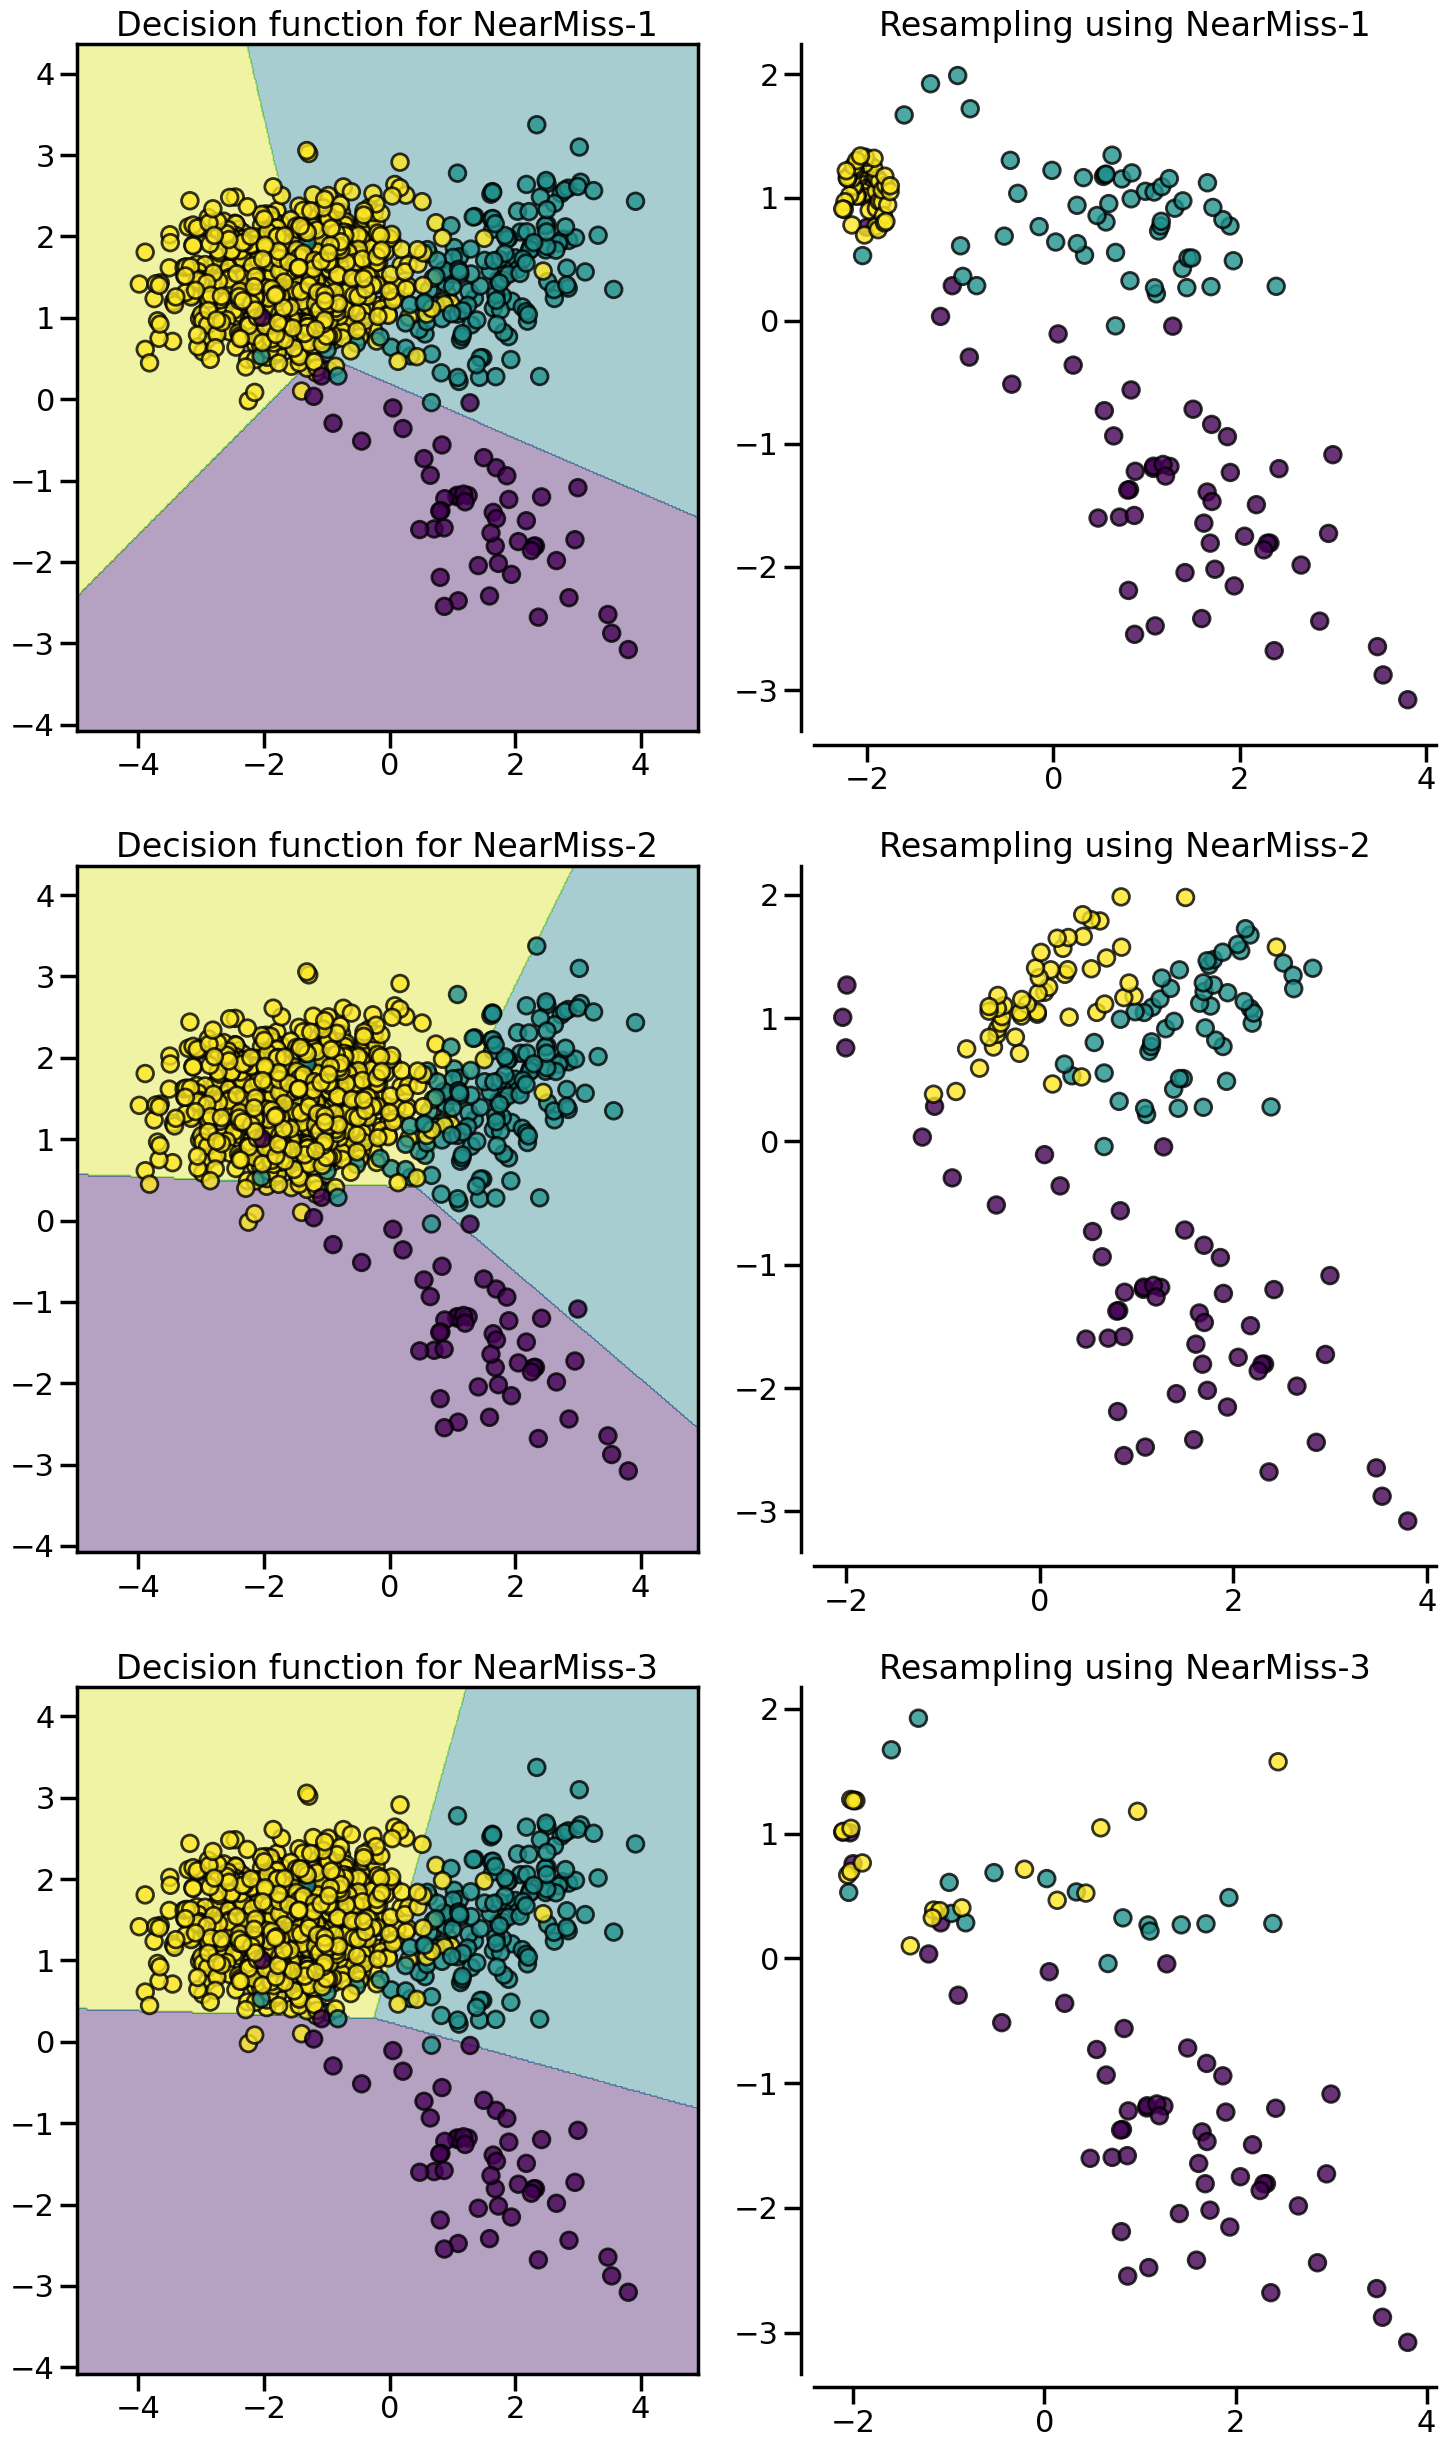

In [9]:
from imblearn.under_sampling import NearMiss

X, y = create_dataset(n_samples=1000, weights=(0.05, 0.15, 0.8), class_sep=1.5)

samplers = [NearMiss(version=1), NearMiss(version=2), NearMiss(version=3)]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 25))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X,
        y,
        model,
        ax[0],
        title=f"Decision function for {sampler.__class__.__name__}-{sampler.version}",
    )
    plot_resampling(
        X,
        y,
        sampler,
        ax[1],
        title=f"Resampling using {sampler.__class__.__name__}-{sampler.version}",
    )
fig.tight_layout()

:class:`~imblearn.under_sampling.EditedNearestNeighbours` removes samples of
the majority class for which their class differ from the one of their
nearest-neighbors. This sieve can be repeated which is the principle of the
:class:`~imblearn.under_sampling.RepeatedEditedNearestNeighbours`.
:class:`~imblearn.under_sampling.AllKNN` is slightly different from the
:class:`~imblearn.under_sampling.RepeatedEditedNearestNeighbours` by changing
the $k$ parameter of the internal nearest neighors algorithm,
increasing it at each iteration.



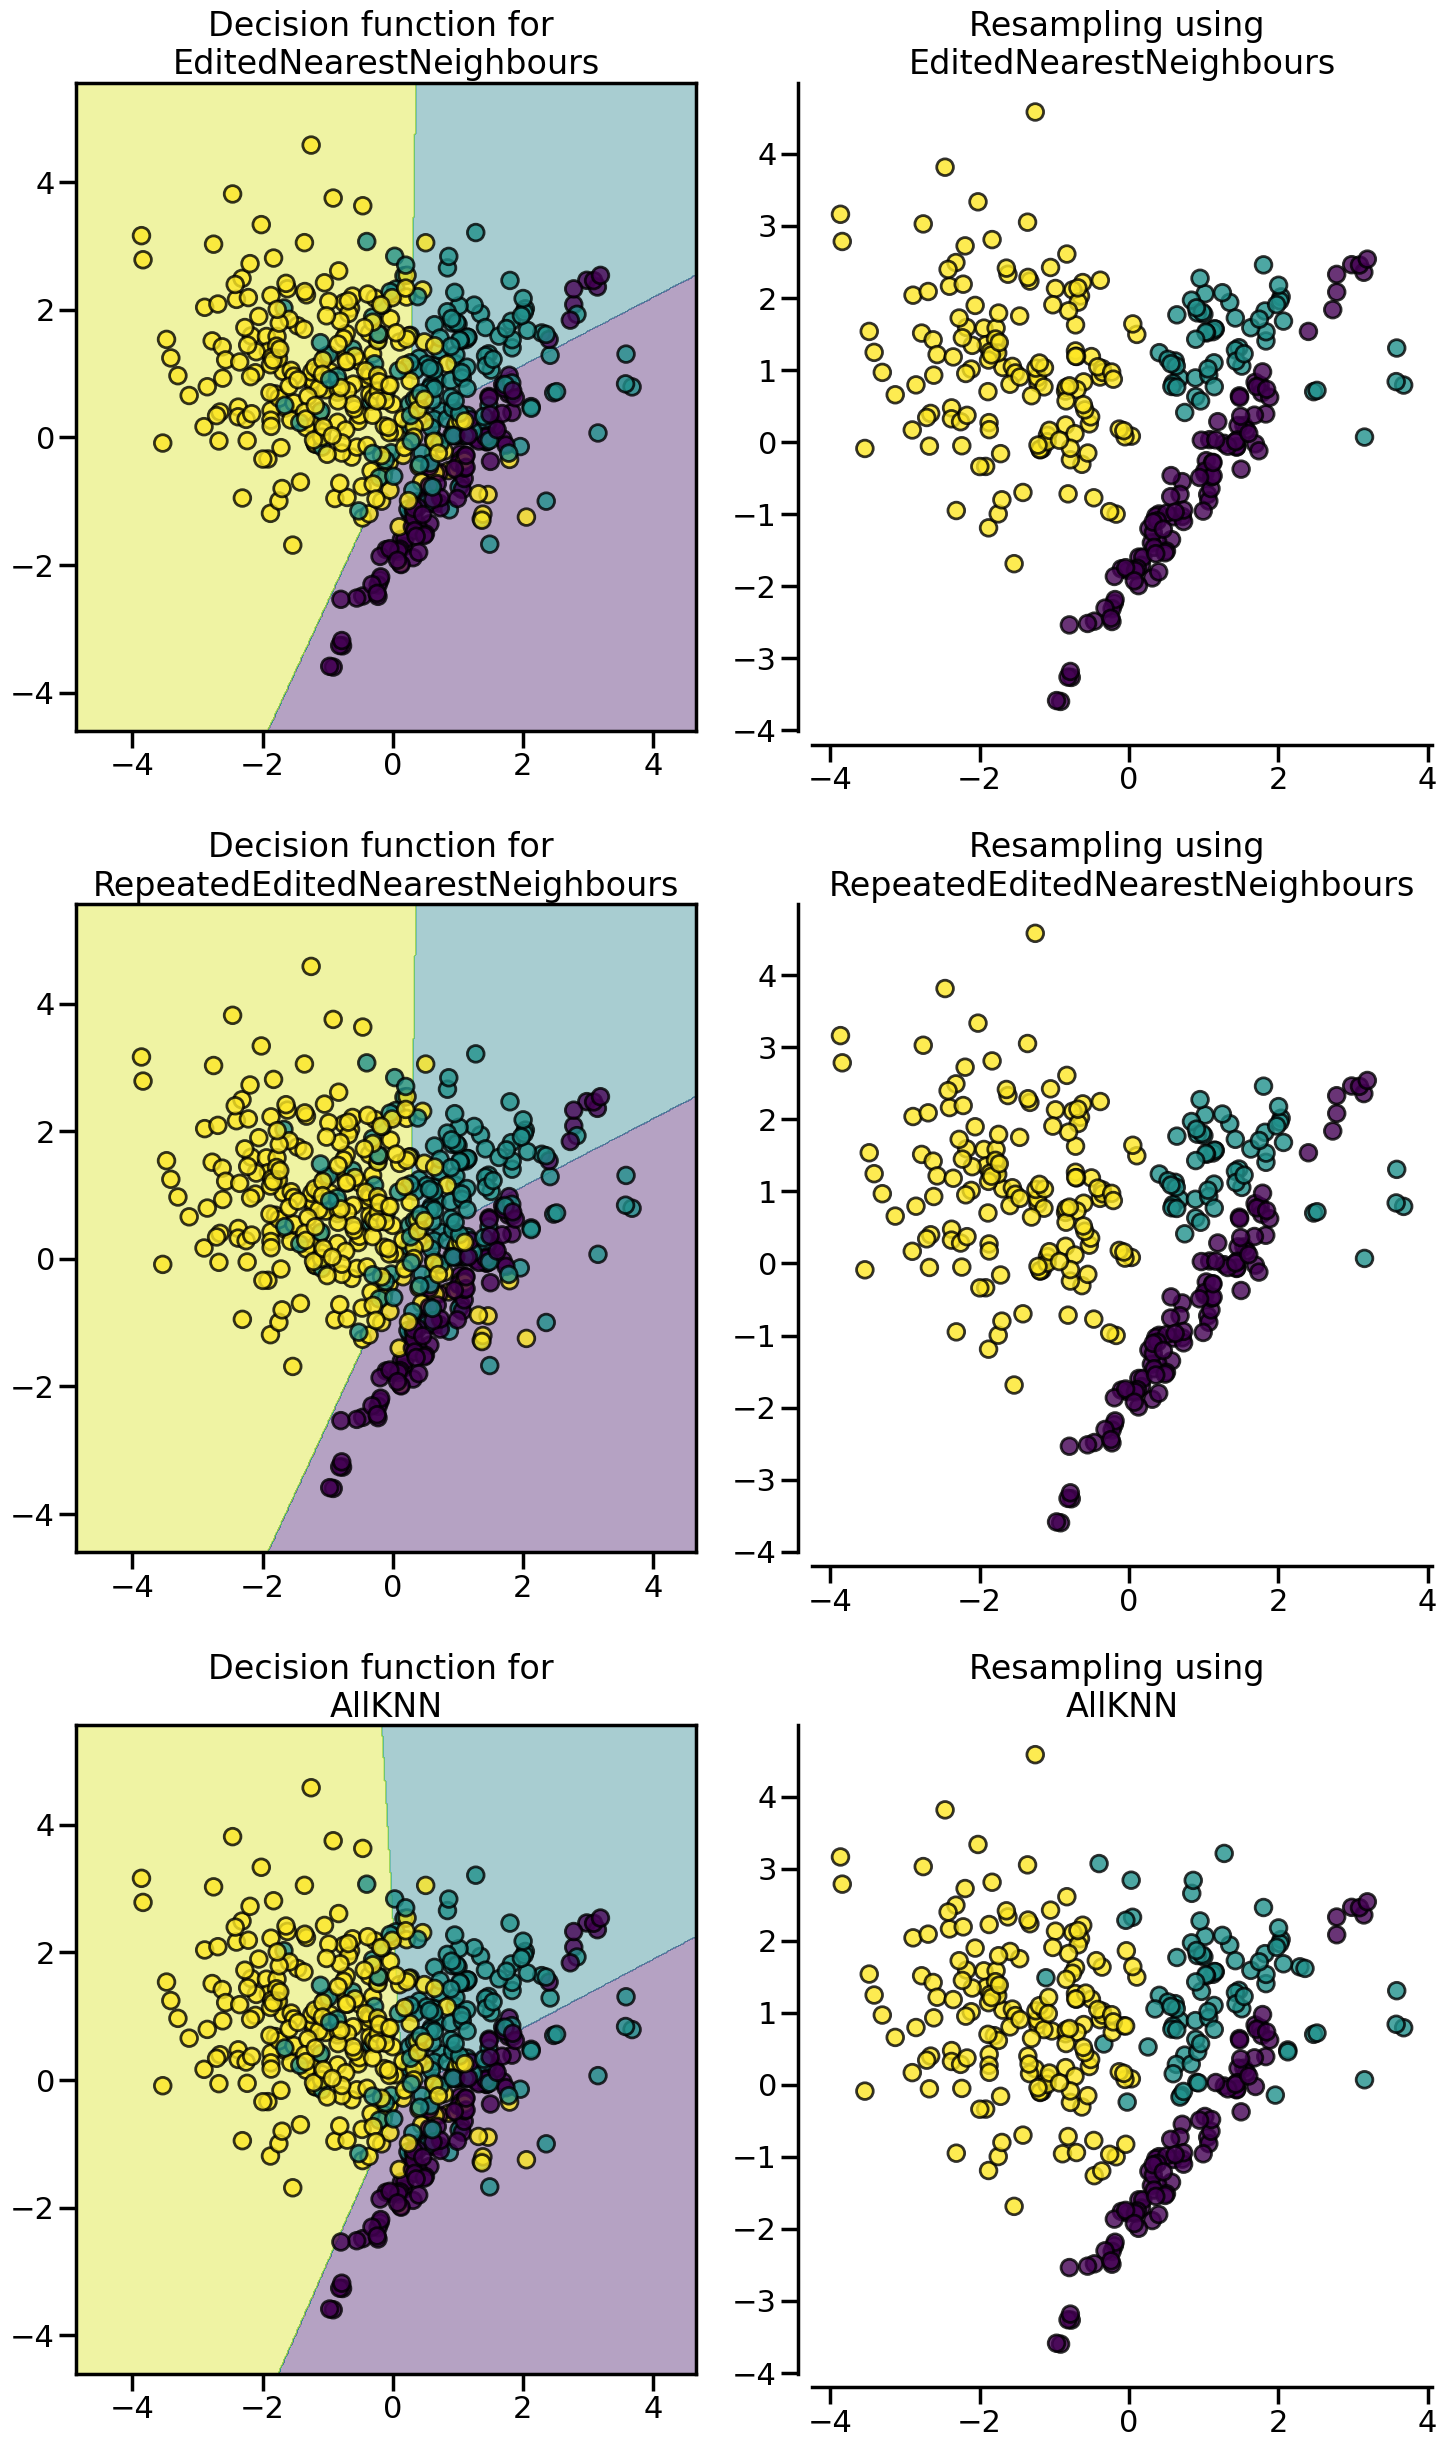

In [10]:
from imblearn.under_sampling import (
    AllKNN,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
)

X, y = create_dataset(n_samples=500, weights=(0.2, 0.3, 0.5), class_sep=0.8)

samplers = [
    EditedNearestNeighbours(),
    RepeatedEditedNearestNeighbours(),
    AllKNN(allow_minority=True),
]

fig, axs = plt.subplots(3, 2, figsize=(15, 25))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, clf, ax[0], title=f"Decision function for \n{sampler.__class__.__name__}"
    )
    plot_resampling(
        X, y, sampler, ax[1], title=f"Resampling using \n{sampler.__class__.__name__}"
    )

fig.tight_layout()

:class:`~imblearn.under_sampling.CondensedNearestNeighbour` makes use of a
1-NN to iteratively decide if a sample should be kept in a dataset or not.
The issue is that :class:`~imblearn.under_sampling.CondensedNearestNeighbour`
is sensitive to noise by preserving the noisy samples.
:class:`~imblearn.under_sampling.OneSidedSelection` also used the 1-NN and
use :class:`~imblearn.under_sampling.TomekLinks` to remove the samples
considered noisy. The
:class:`~imblearn.under_sampling.NeighbourhoodCleaningRule` use a
:class:`~imblearn.under_sampling.EditedNearestNeighbours` to remove some
sample. Additionally, they use a 3 nearest-neighbors to remove samples which
do not agree with this rule.



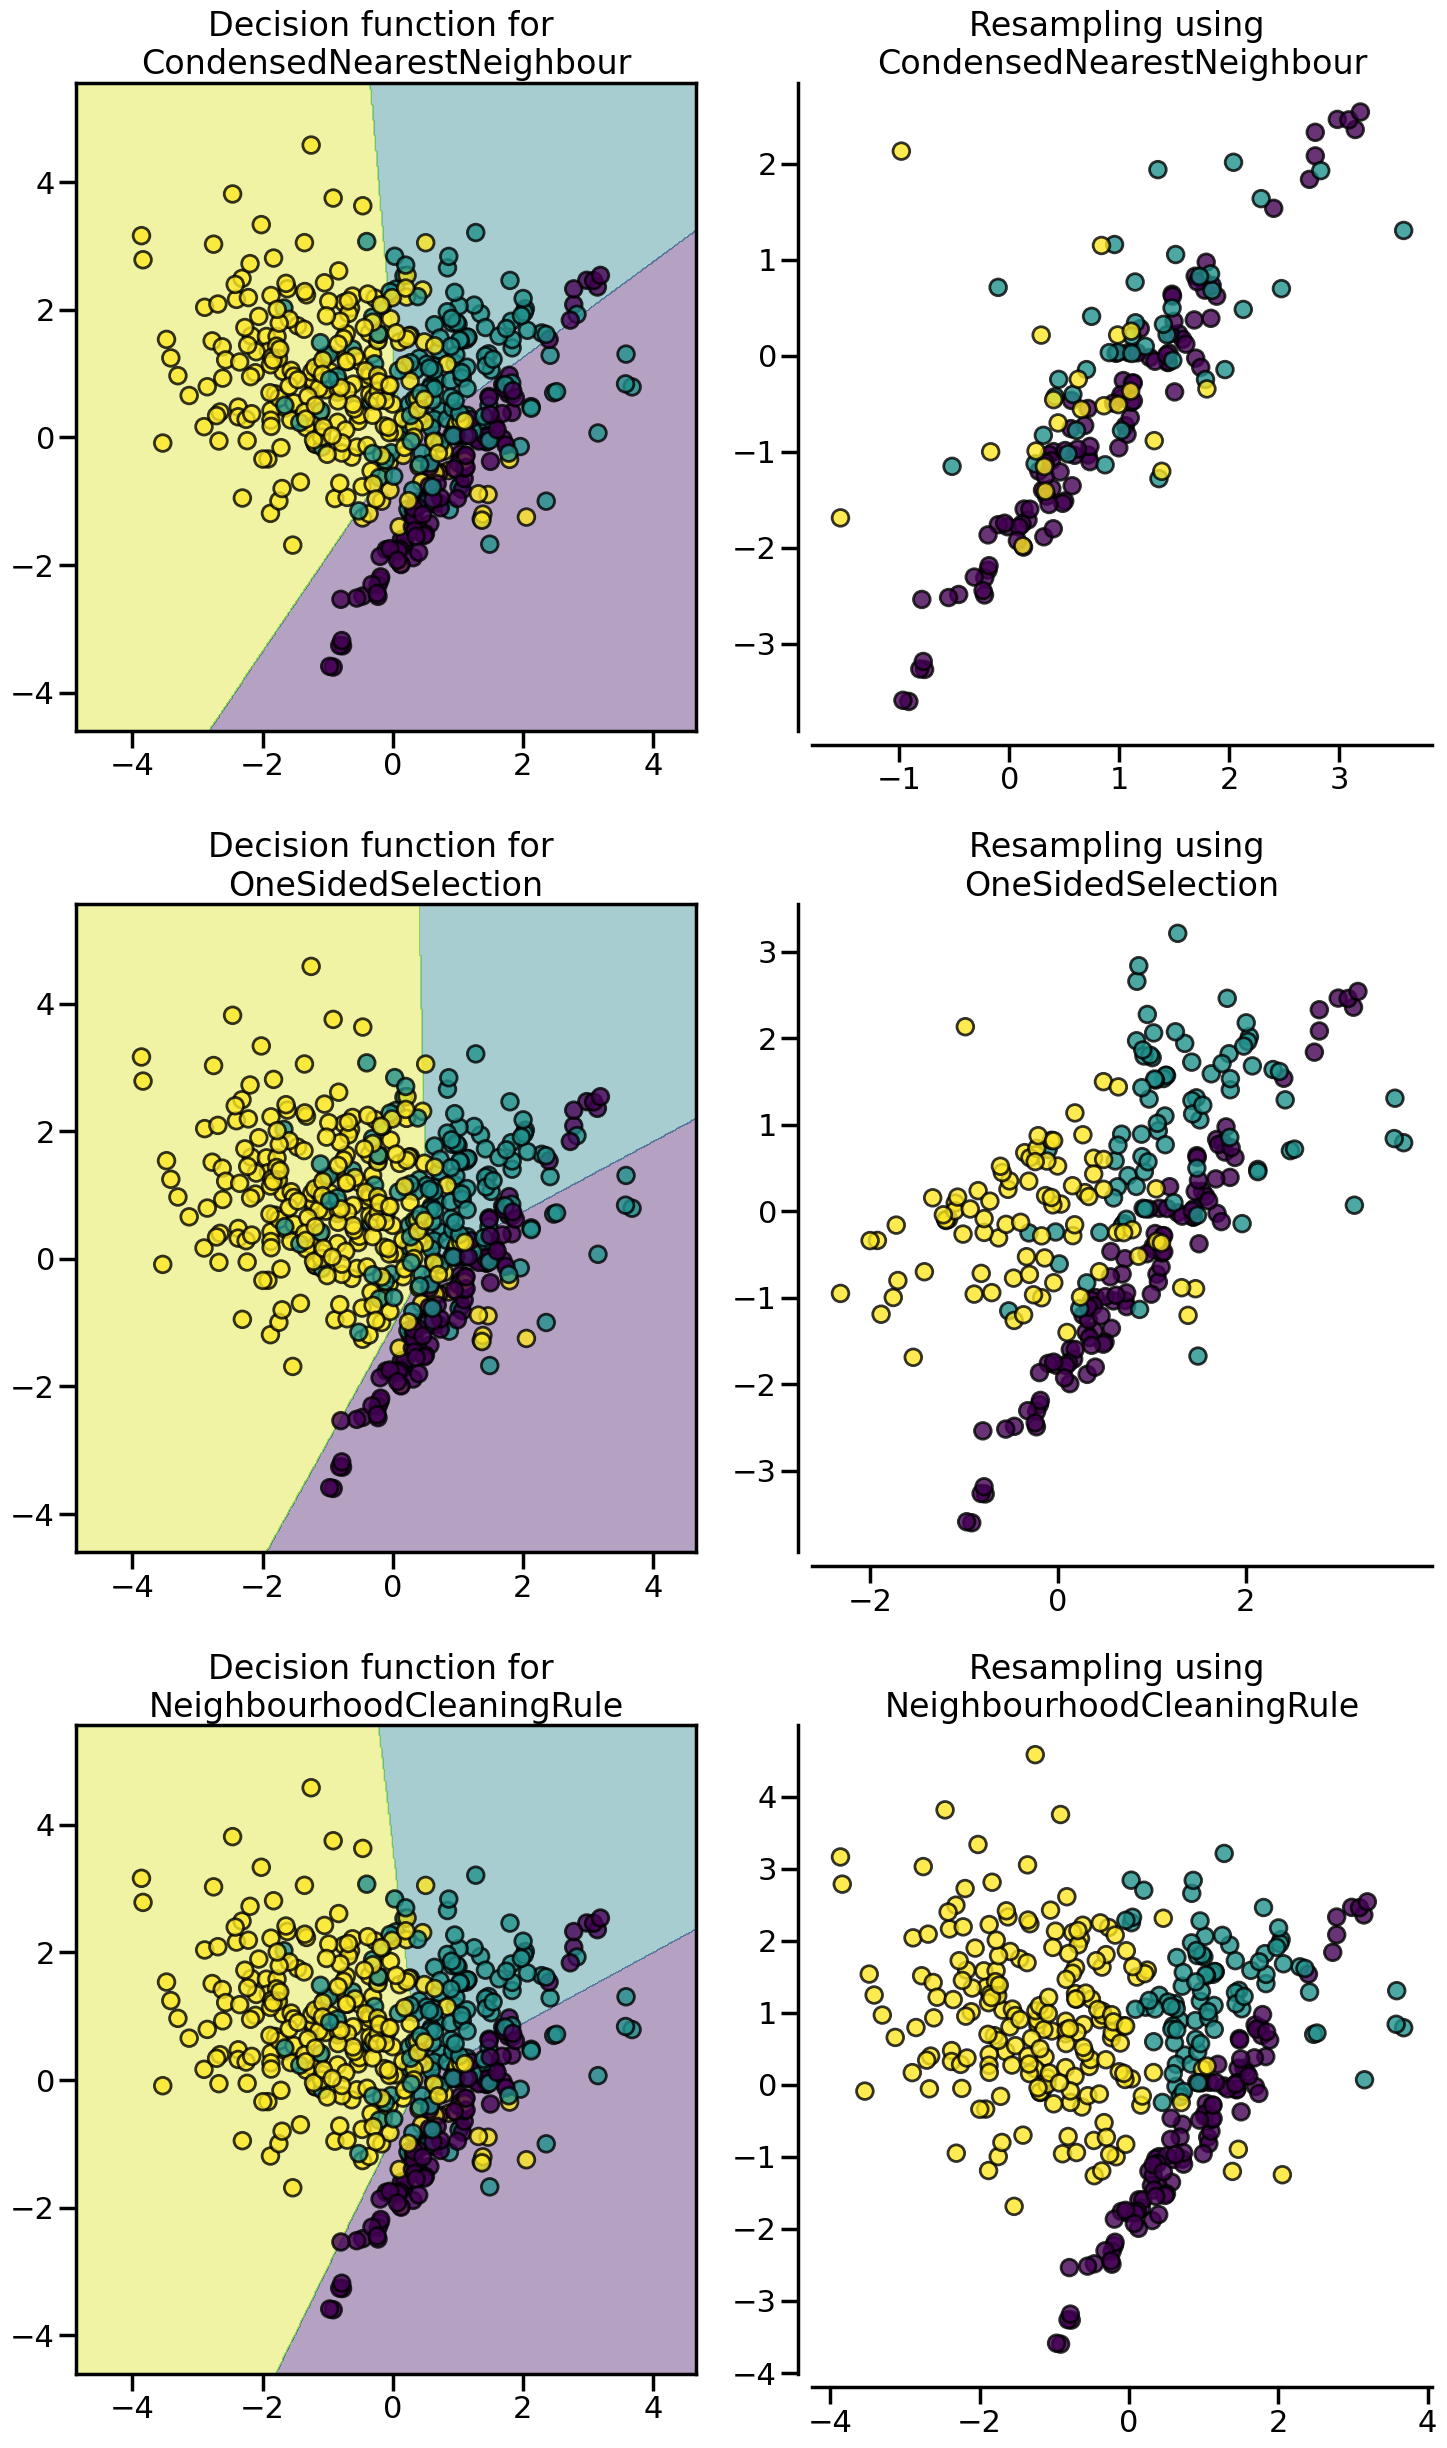

In [11]:
from imblearn.under_sampling import (
    CondensedNearestNeighbour,
    NeighbourhoodCleaningRule,
    OneSidedSelection,
)

X, y = create_dataset(n_samples=500, weights=(0.2, 0.3, 0.5), class_sep=0.8)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 25))

samplers = [
    CondensedNearestNeighbour(random_state=0),
    OneSidedSelection(random_state=0),
    NeighbourhoodCleaningRule(),
]

for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, clf, ax[0], title=f"Decision function for \n{sampler.__class__.__name__}"
    )
    plot_resampling(
        X, y, sampler, ax[1], title=f"Resampling using \n{sampler.__class__.__name__}"
    )
fig.tight_layout()

:class:`~imblearn.under_sampling.InstanceHardnessThreshold` uses the
prediction of classifier to exclude samples. All samples which are classified
with a low probability will be removed.



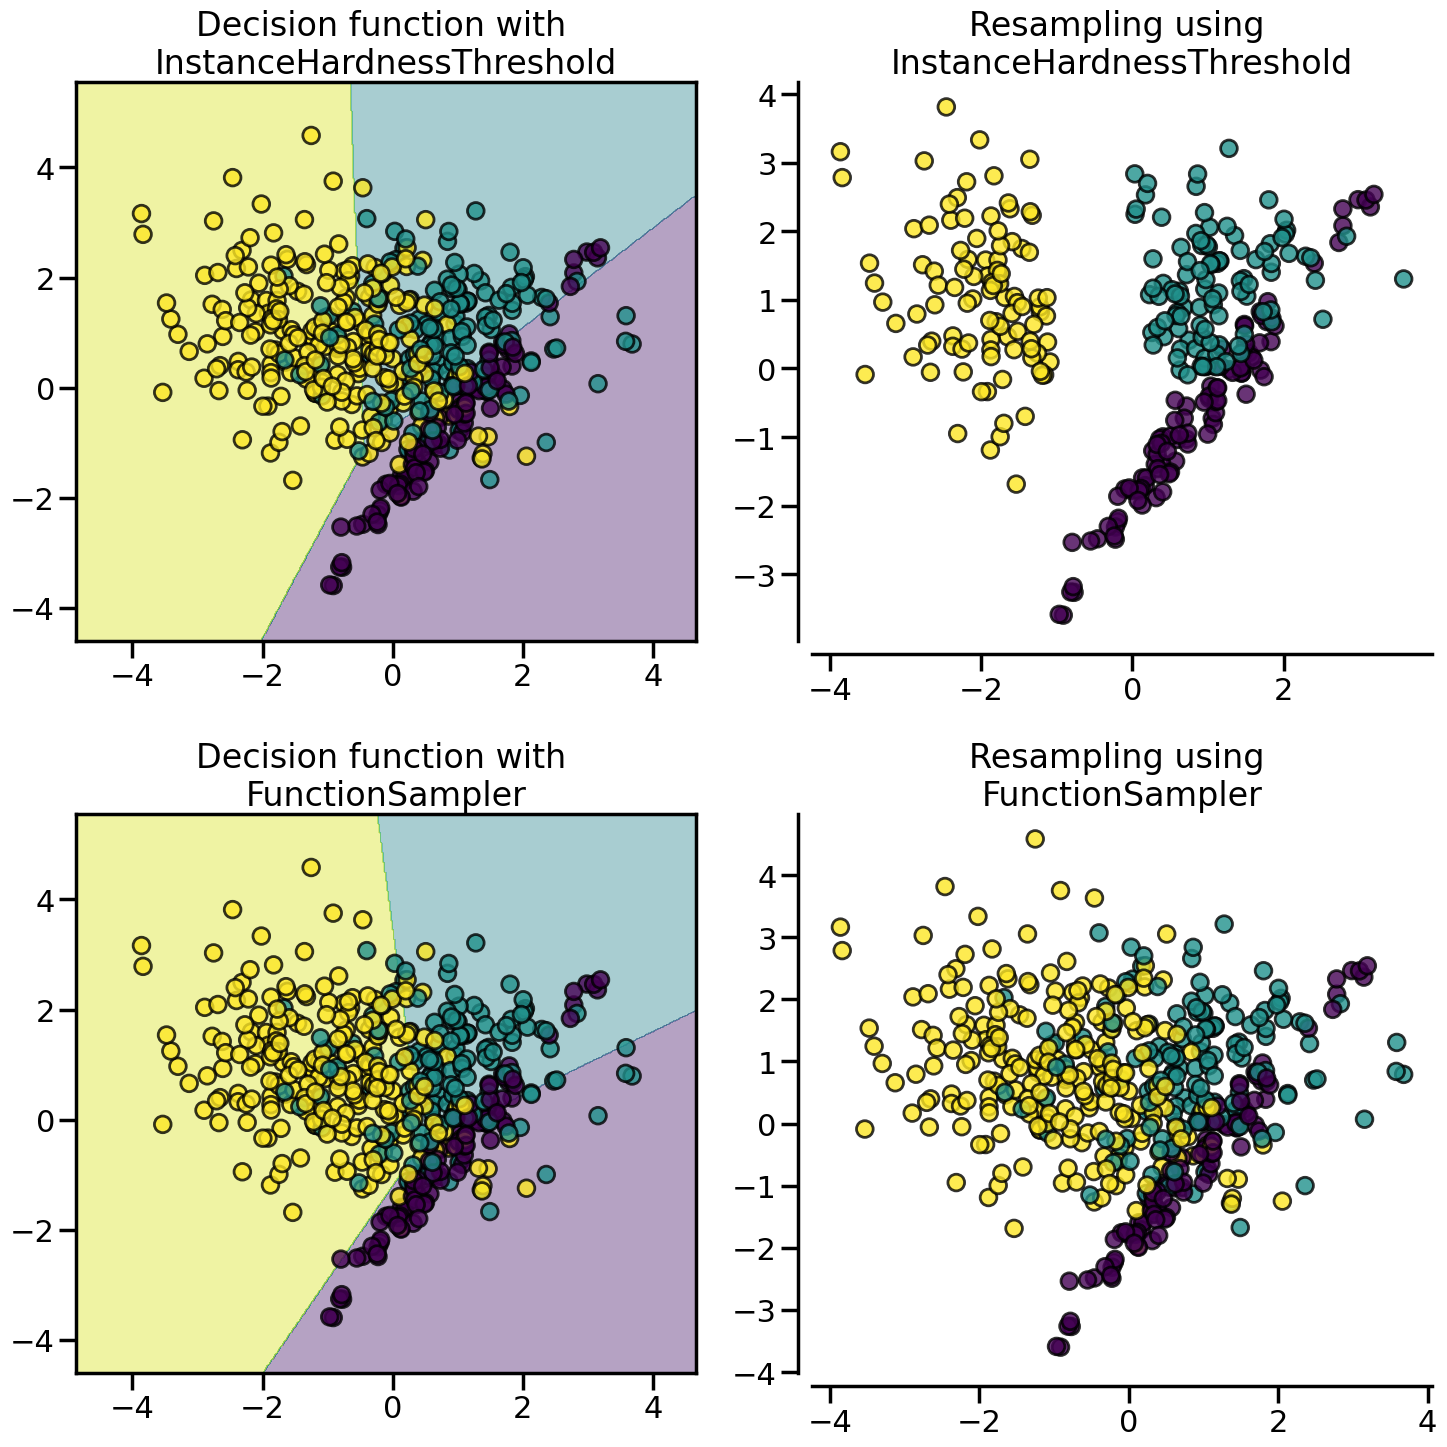

In [12]:
from imblearn.under_sampling import InstanceHardnessThreshold

samplers = {
    FunctionSampler(),  # identity resampler
    InstanceHardnessThreshold(
        estimator=LogisticRegression(),
        random_state=0,
    ),
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X,
        y,
        model,
        ax[0],
        title=f"Decision function with \n{sampler.__class__.__name__}",
    )
    plot_resampling(
        X, y, sampler, ax[1], title=f"Resampling using \n{sampler.__class__.__name__}"
    )

fig.tight_layout()
plt.show()